# Electric Vehicles Market Size Analysis using Python

### Market Size Analysis is the process of estimating the potential sales for a product or service within a particular market segment. In the context of electric vehicles (EVs), it involves assessing the total volume of EV registrations to understand the growth of the market, forecast future trends, and help stakeholders make informed decisions regarding production, infrastructure development, and policy-making.

## Import required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

## Load and read the data

In [3]:
ev_data = pd.read_csv('Electric_Vehicle_Population_Data.csv')
print(ev_data.head())


   VIN (1-10)     County       City State  Postal Code  Model Year   Make  \
0  5YJYGDEE1L       King    Seattle    WA      98122.0        2020  TESLA   
1  7SAYGDEE9P  Snohomish    Bothell    WA      98021.0        2023  TESLA   
2  5YJSA1E4XK       King    Seattle    WA      98109.0        2019  TESLA   
3  5YJSA1E27G       King   Issaquah    WA      98027.0        2016  TESLA   
4  5YJYGDEE5M     Kitsap  Suquamish    WA      98392.0        2021  TESLA   

     Model           Electric Vehicle Type  \
0  MODEL Y  Battery Electric Vehicle (BEV)   
1  MODEL Y  Battery Electric Vehicle (BEV)   
2  MODEL S  Battery Electric Vehicle (BEV)   
3  MODEL S  Battery Electric Vehicle (BEV)   
4  MODEL Y  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible             291   
1  Eligibility unknown as battery range has not b...               0   
2            Clean Alternative Fuel Vehicle 

In [4]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

## Check if there is null data

In [5]:
ev_data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

## Remove the null data

In [6]:
ev_data = ev_data.dropna()

In [7]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177473 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177473 non-null  object 
 1   County                                             177473 non-null  object 
 2   City                                               177473 non-null  object 
 3   State                                              177473 non-null  object 
 4   Postal Code                                        177473 non-null  float64
 5   Model Year                                         177473 non-null  int64  
 6   Make                                               177473 non-null  object 
 7   Model                                              177473 non-null  object 
 8   Electric Vehicle Type                              177473 non-null  object 
 9 

# Step 1: EV Adoption Over Time

## Visualize the historical growth trend of EV registrations

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


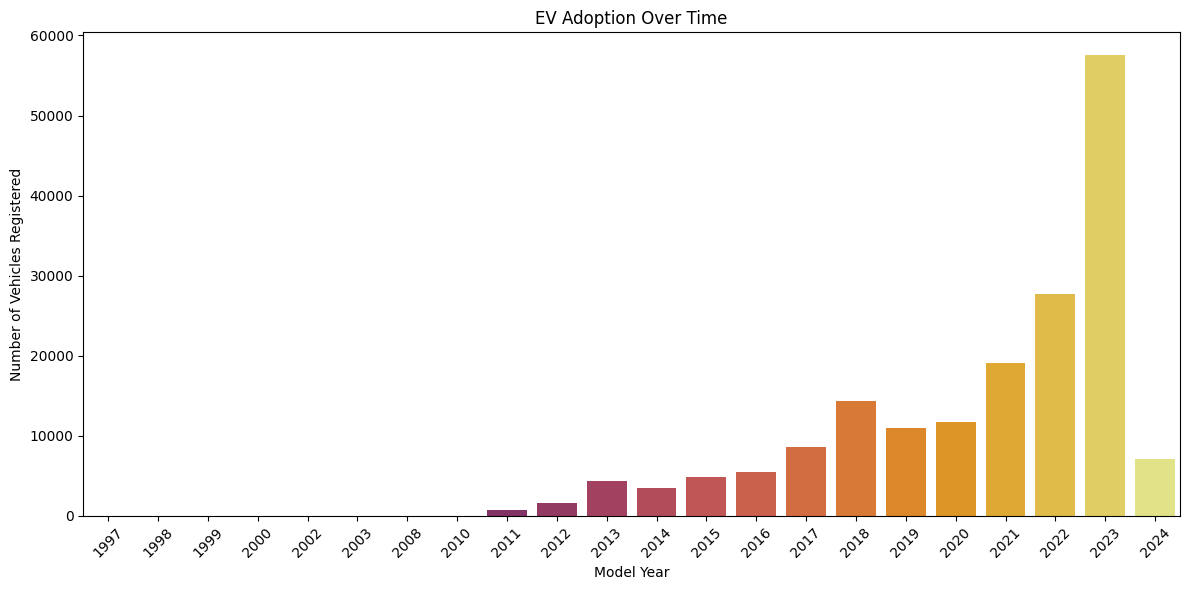

In [8]:
# EV Adoption Over Time

plt.figure(figsize=(12, 6))
ev_adoption_by_year = ev_data['Model Year'].value_counts().sort_index()
sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette="inferno")
plt.title('EV Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Based on the bar chart, we can see that more electric vehicles (EVs) are being adopted over time. There's a noticeable increase starting around 2016, where EV registrations start to rise more quickly. In 2023, there's a big jump in registered EVs, reaching the highest point on the graph, showing a peak in EV adoption.

# Step 2: Forecast future EV registrations based on historical trends

### Calculate the number of EVs registered every year

In [24]:
ev_registration_counts = ev_data['Model Year'].value_counts().reset_index()
ev_registration_counts.columns = ['Model Year', 'Registration']
ev_registration_counts


,Model Year,Registration
0,2023,57519
1,2022,27708
2,2021,19063
3,2018,14286
4,2020,11740
5,2019,10913
6,2017,8534
7,2024,7072
8,2016,5469
9,2015,4826


### The dataset provides the number of electric vehicles registered each year from 1997 through 2024. However, the data for 2024 is incomplete as it only contains the data till March. To forecast the total number of EVs expected to be registered in 2024, we can use a growth rate based approach from previous complete years.

In [25]:
filtered_counts = ev_registration_counts[ev_registration_counts['Model Year'] != 2024]
filtered_counts

,Model Year,Registration
0,2023,57519
1,2022,27708
2,2021,19063
3,2018,14286
4,2020,11740
5,2019,10913
6,2017,8534
8,2016,5469
9,2015,4826
10,2013,4399


### Create a Linear Regression model to predict the number of registration in the upcoming year

In [26]:
# Setting up independent and dependent variables
X = filtered_counts[['Model Year']] 
y = filtered_counts['Registration']  

In [27]:
# Training the linear regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [28]:
# Evaluating the model (comparing predictions with actual data)
y_pred = model.predict(X)
mse = np.mean((y_pred - y) ** 2)
print("Mean Squared Error:", mse)

Mean Squared Error: 96318481.32783735


In [29]:
# Using the trained model to predict future registrations
future_years = [[2024], [2025], [2026]]  # Future years
future_registration = model.predict(future_years)
print("Predicted Registration for Future Years:", future_registration)

Predicted Registration for Future Years: [21732.57375523 22807.69799907 23882.8222429 ]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


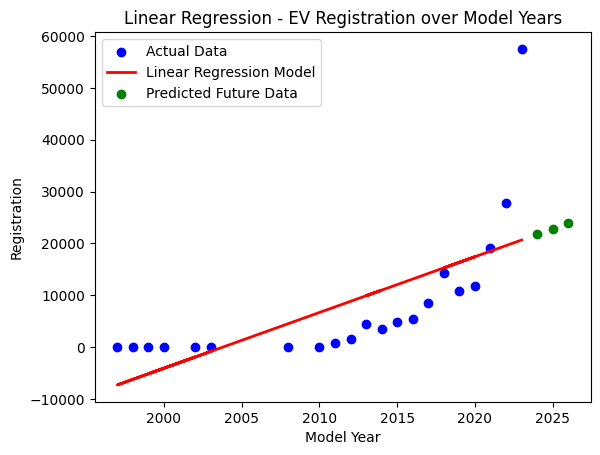

In [32]:
# Visualizing the results
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Linear Regression Model')
plt.scatter(future_years, future_registration, color='green', label='Predicted Future Data')
plt.title('Linear Regression - EV Registration over Model Years')
plt.xlabel('Model Year')
plt.ylabel('Registration')
plt.legend()
plt.show()

# Step 3: Analyze the distribution of EV registrations across different models, makes, and geographical regions

In [33]:
# 

# Step 4: Estimate the market size and growth potential of the EV market for upcoming years

# Step 5: Provide insights to support stakeholders in decision-making processes related to production, infrastructure planning, and policy formulation